# Problem Set 4

## Amanda Markee – Animal Crossing New Horizons Bugs (Standard Price x Flick Price)

Note: For some reason, the kernel keeps freezing when you try to run the code more than once. Please stop the kernel if it takes too long, and simpy re-run the cell. Once you enter the bug name, if the code prompts you to do it again, just click enter without entering another ID.

### Searching Prices for Specific Bugs

For the first portion of code, I wanted to see if I could replicate Dr. Gitzendanner's API tutorial methods, and provide a way for users to search the ACNH Bug API for a particular bug's price. For the following example, we can use "common_butterfly" as our bug name, when prompted. This code should produce the standard price for the insect of choice.

In [1]:
import urllib.request, urllib.parse, urllib.error
import json

serviceurl = 'https://acnhapi.com/v1/bugs/'

while True:
    bug_name = input('Enter a bug name: ') # exclude this part if you want information on all bugs in dataset 
    if len(bug_name) < 1: break

    url = serviceurl + bug_name # NOTE: use common_butterfly as example name

    print('Retrieving', url)
    uh = urllib.request.urlopen(urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'}))
    data = uh.read().decode()
    print('Retrieved', len(data), 'characters')
    

    try:
        js = json.loads(data)
    except:
        js = None
        
    # Comment out because it's kind of long   
    #print(json.dumps(js))
    
    print(js['name']['name-USen'])
    print(f'The standard price for this bug is', js['price'])


Enter a bug name:  1


Retrieving https://acnhapi.com/v1/bugs/1
Retrieved 1423 characters
common butterfly
The standard price for this bug is 160


Enter a bug name:  


### Data Visualization for ACNH Bugs

For the visualization portion of the problem set, I chose to transform the API json information into a readable CSV, with printed associated summary statistics for the standard bug price, vs when selling to the insect enthusiast character named Flick. The code below takes information from the API and transforms the data given, into a table portraying the file name (insect name), availability, prices, various catch phrases from the characters when the bugs are caught, and links to images of each bug.

In [4]:
import pandas as pd
url = 'https://acnhapi.com/v1/bugs/' # save api url

uh = urllib.request.urlopen(urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})) 
data = uh.read().decode() # standardize data 
parsed = json.loads(data) # parse out the data to read into data frame

df2 = pd.DataFrame.from_dict(parsed, orient="index") # display the API json data as a pandas dataframe
(print(df2.describe())) # display summary statistics for the standard price vs price when sold to the character Flick
df2.to_csv('acnh_test.csv', index=False) # export api information to CSV format

            id         price   price-flick
count  80.0000     80.000000     80.000000
mean   40.5000   2219.000000   3328.500000
std    23.2379   3210.183795   4815.275693
min     1.0000     10.000000     15.000000
25%    20.7500    237.500000    356.250000
50%    40.5000    575.000000    862.500000
75%    60.2500   2625.000000   3937.500000
max    80.0000  12000.000000  18000.000000


Lastly, when toying with the code to create the .csv, I couldn't get the dataframe to look pretty. However, if we open the .csv in a new tab, it should look like the following:

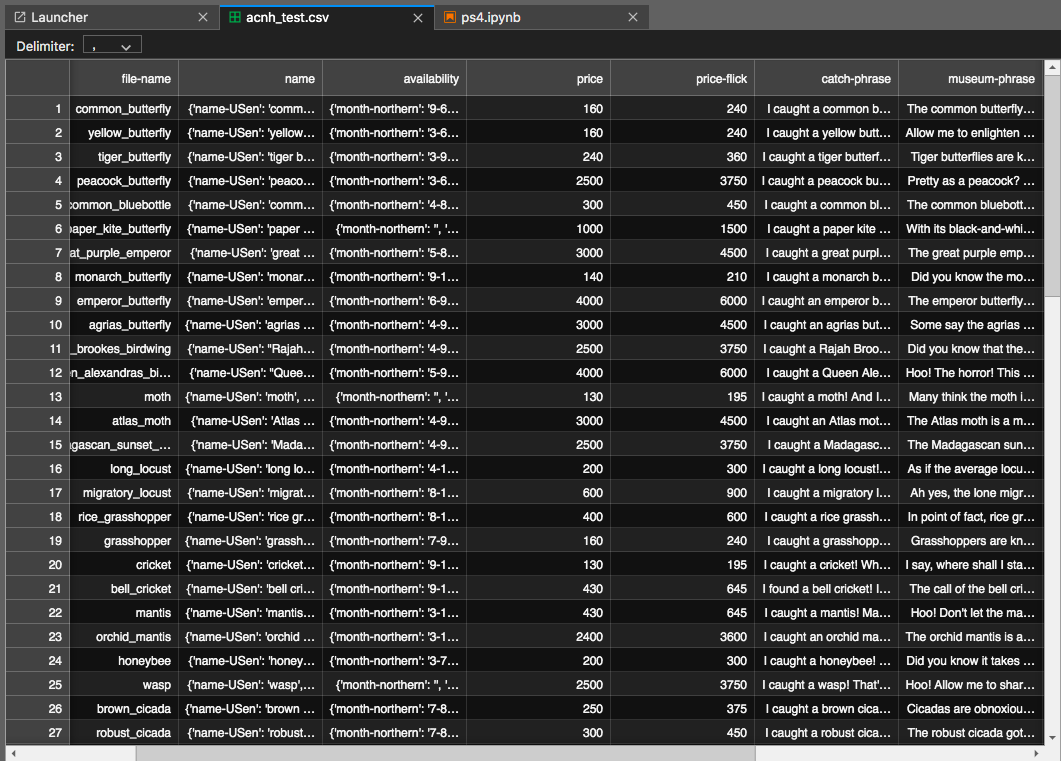